# Import the necessary libaries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data=np.array([[11,8,4],
 [3,13,3],
  [6,16,13],
   [16,8,9],
    [0,1,4],
     [16,8,1],
      [0,7,15],
       [14,19,14],
        [18,14,13],
         [13,19,18]])

In [4]:
data.shape

(10, 3)

Step1 : Find Mean


In [5]:
mean=np.mean(data, axis=0)
mean=np.matrix(mean)
mean

matrix([[ 9.7, 11.3,  9.4]])

Step2: Subtract mean


In [6]:
data_sub=data-mean
data_sub

matrix([[  1.3,  -3.3,  -5.4],
        [ -6.7,   1.7,  -6.4],
        [ -3.7,   4.7,   3.6],
        [  6.3,  -3.3,  -0.4],
        [ -9.7, -10.3,  -5.4],
        [  6.3,  -3.3,  -8.4],
        [ -9.7,  -4.3,   5.6],
        [  4.3,   7.7,   4.6],
        [  8.3,   2.7,   3.6],
        [  3.3,   7.7,   8.6]])

Step3: Cov(X)

In [7]:
cov_X=np.cov(data.T)
cov_X

array([[47.34444444, 16.43333333,  4.8       ],
       [16.43333333, 34.23333333, 21.75555556],
       [ 4.8       , 21.75555556, 35.82222222]])

Step4: Decomposing Cov(X) to eigenvector

In [8]:
eigValue, eigVector=np.linalg.eig(cov_X)
eigValue, eigVector

(array([68.13767142, 38.29344163, 10.96888695]),
 array([[-0.60394947, -0.75372118,  0.25913205],
        [-0.61670866,  0.23596888, -0.75099209],
        [-0.50489154,  0.61337025,  0.60733966]]))

In [9]:
E=eigVector[:, :2]
E

array([[-0.60394947, -0.75372118],
       [-0.61670866,  0.23596888],
       [-0.50489154,  0.61337025]])

In [10]:
lambda_1=eigValue[:2]
lambda_1=np.diag(lambda_1)
lambda_1

array([[68.13767142,  0.        ],
       [ 0.        , 38.29344163]])

Step5:
Find V

In [11]:
V=E@np.sqrt(lambda_1)
V

array([[-4.98533385, -4.66415441],
       [-5.0906553 ,  1.46021544],
       [-4.16765479,  3.79563909]])

Step6: Find eta

In [12]:
v_square=V**2
v_square

array([[24.85355363, 21.75433641],
       [25.91477135,  2.13222914],
       [17.36934644, 14.40687609]])

In [13]:
v_sum=np.sum(v_square, axis=1)
v_sum=np.matrix(v_sum)
v_sum

matrix([[46.60789003, 28.04700049, 31.77622253]])

In [14]:
data_sub_var=np.var(data_sub, axis=0)
data_sub_var

matrix([[42.61, 30.81, 32.24]])

In [15]:
eta=v_sum-data_sub_var
eta

matrix([[ 3.99789003, -2.76299951, -0.46377747]])

Step6: Reduce Dimension

In [16]:
cov_inv=np.linalg.inv(cov_X)
cov_inv

array([[ 0.02631034, -0.01691987,  0.00675032],
       [-0.01691987,  0.05845302, -0.03323251],
       [ 0.00675032, -0.03323251,  0.0471939 ]])

In [17]:
W=V.T@cov_inv
W

array([[-0.0731656 , -0.07471132, -0.06116521],
       [-0.12180035,  0.03813226,  0.09911982]])

In [18]:
Z_n=data_sub@W.T
Z_n

matrix([[ 0.48172419, -0.81942394],
        [ 0.75465763,  0.2465203 ],
        [-0.30062521,  0.98671425],
        [-0.18992987, -0.93282656],
        [ 1.80952506,  0.25345405],
        [ 0.29939179, -1.72578513],
        [ 0.68843987,  1.57256563],
        [-1.1712492 ,  0.22582809],
        [-1.02918982, -0.55115441],
        [-1.34274443,  0.74410772]])

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Generate the dataframe from the excel file**

In [23]:
df = pd.read_excel("data/beer_rnd.xlsx")
df.head()

,cost,size,alcohol,reputat,color,aroma,taste,rnd1,rnd2,rnd3,rnd4,rnd5,rnd6,rnd7
0,10,15,20,85,40,30,50,40,80,65,25,90,45,40
1,100,70,50,30,75,60,80,70,55,45,25,95,95,60
2,65,30,35,80,80,60,90,45,90,65,90,20,95,35
3,0,0,20,30,80,90,100,85,30,45,85,40,80,5
4,10,25,10,100,50,40,60,20,5,25,25,20,25,80


**Find $\tilde{x}_{n}$ from $x_{n}$**

In [24]:
x = df.values
x_mean = np.mean(x,axis=0)
x_n = x - np.matrix(x_mean)
x_n = x_n.T ## Converts row vectors to column vectors
print(x_n.shape)

(14, 99)


In [25]:
C1 = np.cov(x_n)
eig_val,eig_vec = np.linalg.eig(C1)

C2 = np.corrcoef(x_n)## Corr(x,y) = Cov(x,y)/sqrt(Var(x)*Var(y))

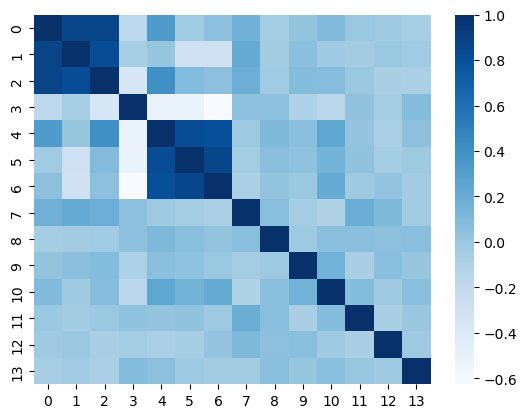

In [26]:
ax = sns.heatmap(C2,cmap='Blues')

**Extract the eigen vectors and eigen values**

In [27]:
eig_sorted = np.sort(eig_val)[::-1]
arg_sort = np.argsort(eig_val)[::-1]

eig_vec_ls = []
eig_val_ls = []
imp_vec = arg_sort[:2]
for i in imp_vec:
    e_1 = eig_vec[:,i]
    lambda_1 = eig_val[i]
    eig_vec_ls.append(e_1)
    eig_val_ls.append(lambda_1)
print(eig_vec_ls)
print(eig_val_ls)

[array([ 0.70193013,  0.37201503,  0.2725436 , -0.32948115,  0.26089232,
        0.14239528,  0.14929638,  0.1630631 , -0.02522316,  0.08848518,
        0.17821216,  0.01762618, -0.01281384, -0.09022515]), array([ 0.28861251,  0.31249978,  0.06952238,  0.41877894, -0.30882442,
       -0.41533076, -0.37304177,  0.33366758, -0.0672483 , -0.10673324,
       -0.3129719 ,  0.03056463,  0.0527614 , -0.05373518])]
[1616.5262627268394, 1338.81303610559]


**Estimate V**

In [28]:
eig_val_arr  = np.array(eig_val_ls)
lambda_1 = np.diag(eig_val_arr)
eig_vec_mat = np.matrix(eig_vec_ls).T
V = eig_vec_mat@np.sqrt(lambda_1)
print(V)

[[ 28.22183629  10.56027235]
 [ 14.95725385  11.43430264]
 [ 10.95790115   2.54380952]
 [-13.24713481  15.32303516]
 [ 10.48944915 -11.29982209]
 [  5.72515136 -15.19686717]
 [  6.00261733 -13.64952169]
 [  6.55612267  12.20882815]
 [ -1.01412339  -2.46060145]
 [  3.55763937  -3.90534714]
 [  7.16520659 -11.45157729]
 [  0.70867892   1.11835357]
 [ -0.51519401   1.93052865]
 [ -3.62759658  -1.96615922]]


**Compute $\sigma^{2}_{i}, i=0,1,2,...13$ and estimate S**

In [29]:
var_ls = []
x_var = np.var(x_n,axis=1)
x_var = np.ravel(x_var)

for i in range(V.shape[0]):
    s = np.sum(np.square(np.ravel(V[i,:])))
    sig_2 = x_var[i] - s
    var_ls.append(sig_2)
var_ls = np.array(var_ls)
S = np.diag(var_ls)
print(S)

[[ 64.84811057   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.          51.71011986   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.          22.21886762   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.         253.2982598    0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          88.82868724
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
  123.93219113   0.           0.           0.           0.
    0.   

**Dimensionality reduction transformation**

In [30]:
C1_inv = np.linalg.inv(C1)
W = V.T@C1_inv
print(W.shape)
print(W)

(2, 14)
[[ 0.01745832  0.00925271  0.00677867 -0.00819482  0.00648888  0.00354164
   0.00371328  0.00405569 -0.00062735  0.00220079  0.00443247  0.0004384
  -0.0003187  -0.00224407]
 [ 0.00788779  0.00854063  0.00190005  0.01144524 -0.00844018 -0.011351
  -0.01019524  0.00911914 -0.0018379  -0.00291702 -0.00855353  0.00083533
   0.00144197 -0.00146858]]


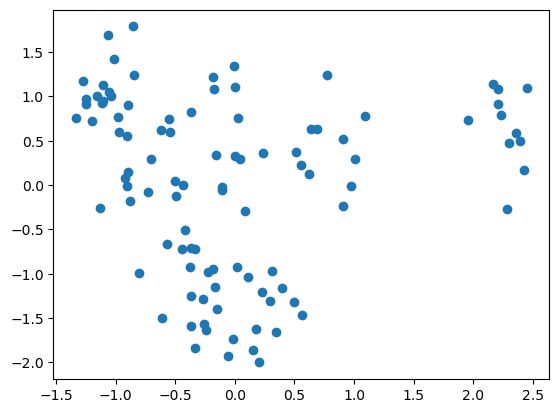

In [31]:
z = W@x_n
z1 = z.T
plt.scatter(np.ravel(z1[:,0]),np.ravel(z1[:,1]))
plt.show()